In [9]:
import matplotlib.pyplot as plt
import numpy as np

from bin.neural_n import NeuralNetwork as NN

In [18]:
### Data ###
N_train = 60000   # Number of training examples from file
N_test = 10000  # Number of testing examples from file
N_output_values = 10

train_data = np.zeros([N_train, 785])
with open('data_set/mnist_train.csv', 'r') as data:
    for x in range(N_train):
        train_data[x] = np.fromstring(next(data), sep=',')

test_data = np.zeros([N_test, 785])
with open('data_set/mnist_test.csv', 'r') as data:
    for x in range(N_test):
        test_data[x] = np.fromstring(next(data), sep=',')

fac = 1 / 255
train_imgs = (train_data[:, 1:]) * fac
train_labels = train_data[:, :1].transpose()[0,:].astype(np.int)

test_imgs = (test_data[:, 1:]) * fac
test_labels = test_data[:, :1].transpose()[0,:].astype(np.int)

train_pairs = list(zip(train_imgs, NN.one_hot_encoder(train_labels, N_output_values)))
test_pairs = list(zip(test_imgs, NN.one_hot_encoder(test_labels, N_output_values)))

In [19]:
### Network ###
net = NN(784,200,10, learning_rate=0.001, epochs=20)
net.train(train_pairs, visualize_cost=False)
net.save_network('load_net_example.npy')

print('Mean squared error:', net.evaluate(test_pairs))
print('Accuracy:', net.accuracy(test_pairs))

Epochs: 100%|██████████| 20/20 [30:08<00:00, 90.43s/it]


Mean squared error: 0.013323455615003794
Accuracy: 92.54 %


Accuracy: 92.54 %


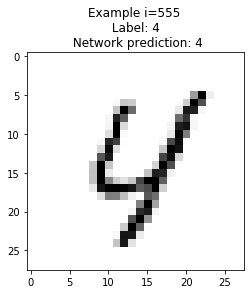

In [24]:
### Loading Network from file and predictions ###
N_test = 10000
N_output_values = 10
test_data = np.zeros([N_test, 785])
with open('data_set/mnist_test.csv', 'r') as data:
    for x in range(N_test):
        test_data[x] = np.fromstring(next(data), sep=',')

fac = 1 / 255
test_imgs = (test_data[:, 1:]) * fac
test_labels = test_data[:, :1].transpose()[0,:].astype(np.int)
test_pairs = list(zip(test_imgs, NN.one_hot_encoder(test_labels, N_output_values)))

net = NN.load_network('load_net_example.npy')

print('Accuracy:', net.accuracy(test_pairs))

i = 555
plt.imshow(test_imgs[i].reshape((28,28)), cmap='Greys')
plt.title('Example i={} \n Label: {} \n Network prediction: {}'.format(i, test_labels[i], net.predict(test_imgs[i])))
plt.plot()
plt.show()